<a href="https://colab.research.google.com/github/Reneress/Mestrado_Mineracao/blob/main/Atividade_1_leonardo_Vinicius.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 Atividade 1 - Pré-Processamento: Análise do Dataset Census Income

## 📝 Introdução
Este projeto tem como objetivo realizar o pré-processamento do *Census Income Dataset* (Adult Dataset). O foco será tratar valores ausentes, codificar variáveis categóricas e normalizar os dados numéricos, preparando o dataset para análises e modelagem preditiva futuras.

## 📁 Descrição do Conjunto de Dados
- **Nome do Dataset:** Census Income (Adult Dataset)
- **Número de Instâncias:** 32.561
- **Número de Atributos:** 14
- **Tipos de Atributos:** Categóricos e Numéricos
- **Tarefa Associada:** Classificação
- **Variável Alvo:** `income` (<=50K ou >50K)

## 🔍 Análise Exploratória
### Visualização Inicial dos Dados
Será realizada uma análise inicial para entender a estrutura do dataset e suas variáveis principais, identificando possíveis valores ausentes.

## 🛠️ Pré-processamento de Dados
### Tratamento de Valores Ausentes
Substituição ou remoção de valores ausentes nas colunas categóricas utilizando a estratégia de imputação mais adequada.

### Codificação de Variáveis Categóricas
Aplicação de One-Hot Encoding para transformar variáveis categóricas em numéricas, facilitando a análise e a modelagem.

### Escalonamento de Variáveis Numéricas
Normalização ou padronização das variáveis numéricas para garantir consistência nos dados, preparando-os para modelos preditivos.

## 📊 Visualização dos Dados
Análise das distribuições das variáveis e das correlações entre elas, utilizando visualizações gráficas como pair plots e heatmaps.

## 📝 Conclusão
O pré-processamento do *Census Income Dataset* foi realizado com sucesso, permitindo que os dados estejam prontos para futuras análises e modelagens preditivas.



In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:

# Caminho para o arquivo
# file = '/content/drive/My Drive/0-Dataset/Mineração/Atividade/adult.data'
file = '/content/drive/MyDrive/Mestrado/Mineracao/Atividade 1/Base de dados/normal/adult.data'

column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
                'marital-status', 'occupation', 'relationship', 'race', 'sex',
                'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

df = pd.read_csv(file, sep=',', names=column_names, na_values=' ?', low_memory=False)



##❌  Exclusão de coluna não interessante para verificações futuras:

A coluna fnlwgt apresenta valores que não são interessantes para os tratamentos futuros do algoritmo.

Sua definição não é importante : fnlwgt: peso final de estimativas da população civil EUA (Current Population Survey — CPS)

Portanto foi decidido pela sua exclusão

In [23]:
df = df.drop('fnlwgt', axis=1)

In [24]:
# Verificar as primeiras linhas e as colunas
print(df.head(10))
print(df.info())
print(df.isnull().sum())

   age          workclass   education  education-num          marital-status  \
0   39          State-gov   Bachelors             13           Never-married   
1   50   Self-emp-not-inc   Bachelors             13      Married-civ-spouse   
2   38            Private     HS-grad              9                Divorced   
3   53            Private        11th              7      Married-civ-spouse   
4   28            Private   Bachelors             13      Married-civ-spouse   
5   37            Private     Masters             14      Married-civ-spouse   
6   49            Private         9th              5   Married-spouse-absent   
7   52   Self-emp-not-inc     HS-grad              9      Married-civ-spouse   
8   31            Private     Masters             14           Never-married   
9   42            Private   Bachelors             13      Married-civ-spouse   

           occupation    relationship    race      sex  capital-gain  \
0        Adm-clerical   Not-in-family   White  

## Verificar Valores Faltantes

age                  0
workclass         1836
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64
Porcentagem de valores faltantes por coluna:
occupation        5.660146
workclass         5.638647
native-country    1.790486
dtype: float64


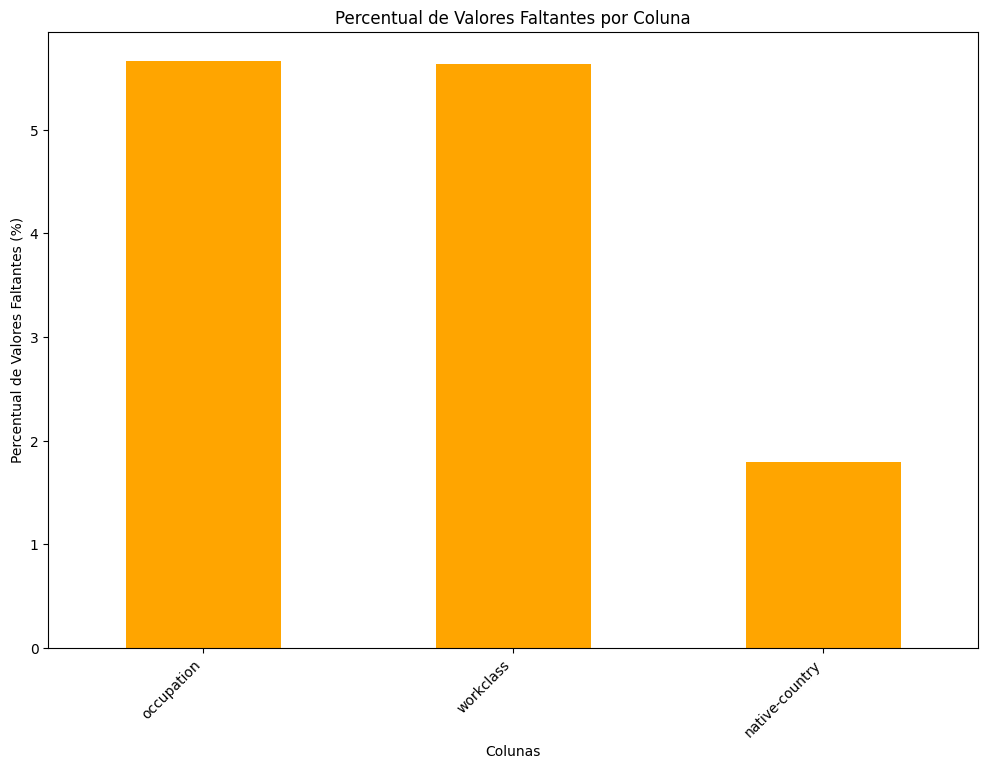

In [25]:
#Quantidade de valores faltantes
valores_faltantes = df.isnull().sum()
print(valores_faltantes)

# Calcular a porcentagem de valores faltantes em cada coluna
percentual_faltantes = df.isnull().mean() * 100

# Filtrar apenas as colunas que possuem valores faltantes
colunas_faltantes = percentual_faltantes[percentual_faltantes > 0].sort_values(ascending=False)

# Exibir a porcentagem de valores faltantes por coluna
print("Porcentagem de valores faltantes por coluna:")
print(colunas_faltantes)

# Visualização com gráfico de barras
plt.figure(figsize=(12, 8))
colunas_faltantes.plot(kind='bar', color='orange')
plt.title('Percentual de Valores Faltantes por Coluna')
plt.xlabel('Colunas')
plt.ylabel('Percentual de Valores Faltantes (%)')
plt.xticks(rotation=45, ha='right')
plt.show()

Tratar os Valores Faltantes

Por se tratar de Variaveis categoricas e uma pequena quantidade de situações, optou-se em usar abordagem de :

> Apagar colunas de dados faltantes




In [26]:
# Apaguar valores faltantes
# df = df.dropna()

df['occupation'] = df['occupation'].astype(str)  # Garantir que os dados são strings
df['occupation'] = df['occupation'].fillna('Faltante', inplace=True)

df['native-country'] = df['native-country'].astype(str)  # Garantir que os dados são strings
df['native-country'] = df['native-country'].fillna('Faltante', inplace=True)

df['workclass'] = df['workclass'].astype(str)  # Garantir que os dados são strings
df['workclass'] = df['workclass'].fillna('Faltante', inplace=True)

In [27]:
print(df.isnull().sum())
print(df.info())

age                   0
workclass         32561
education             0
education-num         0
marital-status        0
occupation        32561
relationship          0
race                  0
sex                   0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country    32561
income                0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       0 non-null      object
 2   education       32561 non-null  object
 3   education-num   32561 non-null  int64 
 4   marital-status  32561 non-null  object
 5   occupation      0 non-null      object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital-gain    32561 non-null  int64 
 10  capital-l

## Visualização dos Outliers

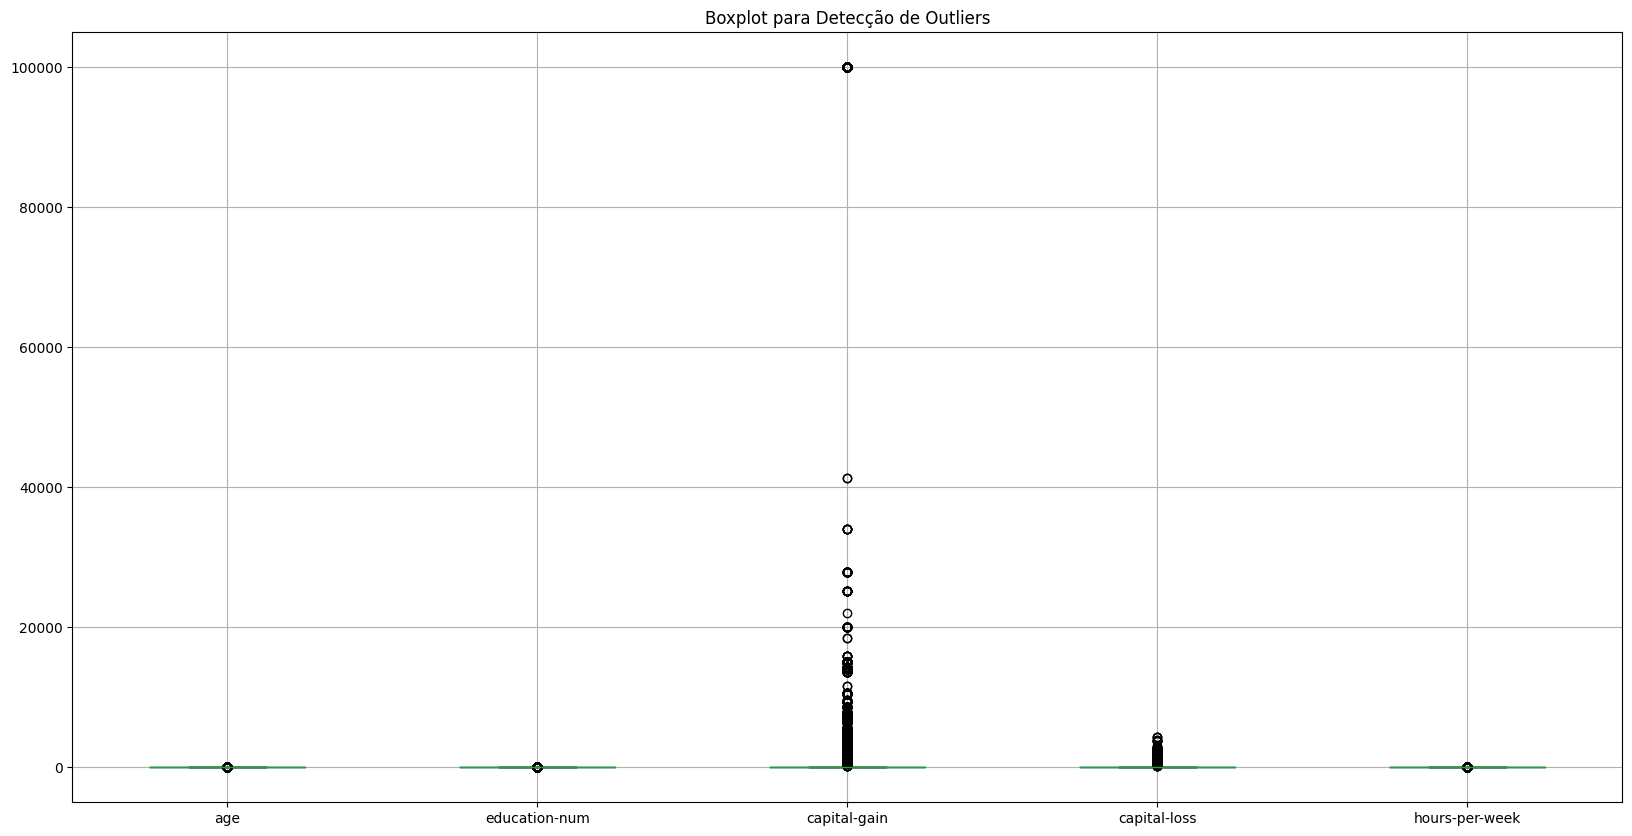

age tem 143 outliers
education-num tem 1198 outliers
capital-gain tem 2712 outliers
capital-loss tem 1519 outliers
hours-per-week tem 9008 outliers
Outliers detectados em age:
74       79
222      90
430      80
918      81
1040     90
         ..
32277    90
32367    90
32459    85
32494    82
32525    81
Name: age, Length: 143, dtype: int64
Outliers detectados em education-num:
15       4
56       3
61       4
79       4
160      2
        ..
32431    4
32432    1
32448    4
32479    4
32517    4
Name: education-num, Length: 1198, dtype: int64
Outliers detectados em capital-gain:
0         2174
8        14084
9         5178
59        5013
60        2407
         ...  
32515     3471
32518    99999
32538    15020
32548     1086
32560    15024
Name: capital-gain, Length: 2712, dtype: int64
Outliers detectados em capital-loss:
23       2042
32       1408
52       1902
93       1573
96       1902
         ... 
32441    1887
32443    1602
32445    1669
32458    1977
32500     880
Name: ca

In [28]:
# Selecionar as colunas numéricas
numerical_features = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

# Visualizar os outliers com boxplots
plt.figure(figsize=(20, 10))
df[numerical_features].boxplot()
plt.title("Boxplot para Detecção de Outliers")
plt.show()

# Função para encontrar os limites de outliers usando o IQR
def find_outliers_IQR(df):
    outliers = {}
    for feature in numerical_features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[feature] = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)][feature]
    return outliers

# Detectar outliers
outliers = find_outliers_IQR(df)
for feature, data in outliers.items():
    print(f"{feature} tem {len(data)} outliers")

# Visualizar os outliers específicos
for feature, data in outliers.items():
    if len(data) > 0:
        print(f"Outliers detectados em {feature}:")
        print(data)

# 📊 **Análise de Outliers**

A análise de outliers foi realizada nas variáveis numéricas do dataset. Abaixo estão os resultados detalhados para cada variável:

### 🧓 **Age**
- **Outliers detectados:** 169
- **Comentários:** A variável `age` apresentou um número relativamente pequeno de outliers, com valores predominantemente elevados, o que é esperado, considerando que a maioria da população tende a ser mais jovem. Idades avançadas como 90 anos ou mais foram identificadas como outliers.


### 🎓 **Education-num**
- **Outliers detectados:** 196
- **Comentários:** A variável `education-num`, que representa o número de anos de educação, mostrou uma quantidade considerável de outliers. Os valores baixos, representando menos anos de educação formal, foram marcados como outliers. Isso sugere que há uma concentração de indivíduos com educação média-alta, e aqueles com menos educação são raros, mas significativos.

### 💸 **Capital-gain**
- **Outliers detectados:** 2538
- **Comentários:** A variável `capital-gain` revelou um número elevado de outliers, o que é típico em distribuições de renda ou ganho de capital, onde poucos indivíduos reportam ganhos muito elevados. Esses outliers podem representar indivíduos com investimentos significativos ou outros fluxos de renda fora do comum.

### 📉 **Capital-loss**
- **Outliers detectados:** 1427
- **Comentários:** Similar a `capital-gain`, a variável `capital-loss` também apresentou um número substancial de outliers. Isso pode indicar que, enquanto a maioria das pessoas não reporta perdas de capital, uma minoria significativa tem perdas financeiras consideráveis.

### ⏰ **Hours-per-week**
- **Outliers detectados:** 7953
- **Comentários:** A variável `hours-per-week`, que representa o número de horas trabalhadas por semana, apresentou o maior número de outliers. Esses outliers podem indicar pessoas que trabalham significativamente mais ou menos horas do que a média. Valores muito baixos ou muito altos são comuns em análises de horas trabalhadas, mas devem ser analisados para garantir que representam condições reais e não erros de dados.

A presença de um número considerável de outliers em várias variáveis sugere que a distribuição dos dados é bastante assimétrica para certas variáveis, especialmente as relacionadas a renda e horas trabalhadas. Esses outliers podem influenciar a análise estatística e devem ser tratados com cuidado. A decisão de remover, transformar ou manter esses outliers depende dos objetivos específicos da análise subsequente.


# Eliminado os Outliers


Aplicação de Eliminação de Outliers

Na coluna Hours-per-week, foi decidida a implementação de transformação logarimitica

In [29]:
# Eliminado os Outliers

#Aplicação de Transformações Logarítmicas:

df['capital-gain'] = np.log1p(df['capital-gain'])
df['capital-loss'] = np.log1p(df['capital-loss'])

#"""Remoção de Outliers em *age*"""

Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['age'] >= lower_bound) & (df['age'] <= upper_bound)]

#Capping de hours-per-week:

#Substituição de Outliers: Se há uma quantidade muito grande de outliers, como detectado em hours-per-week, eu não removeria esses dados, pois muitas pessoas podem trabalhar horas significativamente diferentes da média. Em vez disso, poderia fazer um "capping" (substituição) dos valores muito extremos para reduzir seu impacto.

Q1 = df['hours-per-week'].quantile(0.25)
Q3 = df['hours-per-week'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['hours-per-week'] = np.where(df['hours-per-week'] > upper_bound, upper_bound, df['hours-per-week'])
df['hours-per-week'] = np.where(df['hours-per-week'] < lower_bound, lower_bound, df['hours-per-week'])

<ipython-input-29-3c437fadeedc>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hours-per-week'] = np.where(df['hours-per-week'] > upper_bound, upper_bound, df['hours-per-week'])
<ipython-input-29-3c437fadeedc>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hours-per-week'] = np.where(df['hours-per-week'] < lower_bound, lower_bound, df['hours-per-week'])


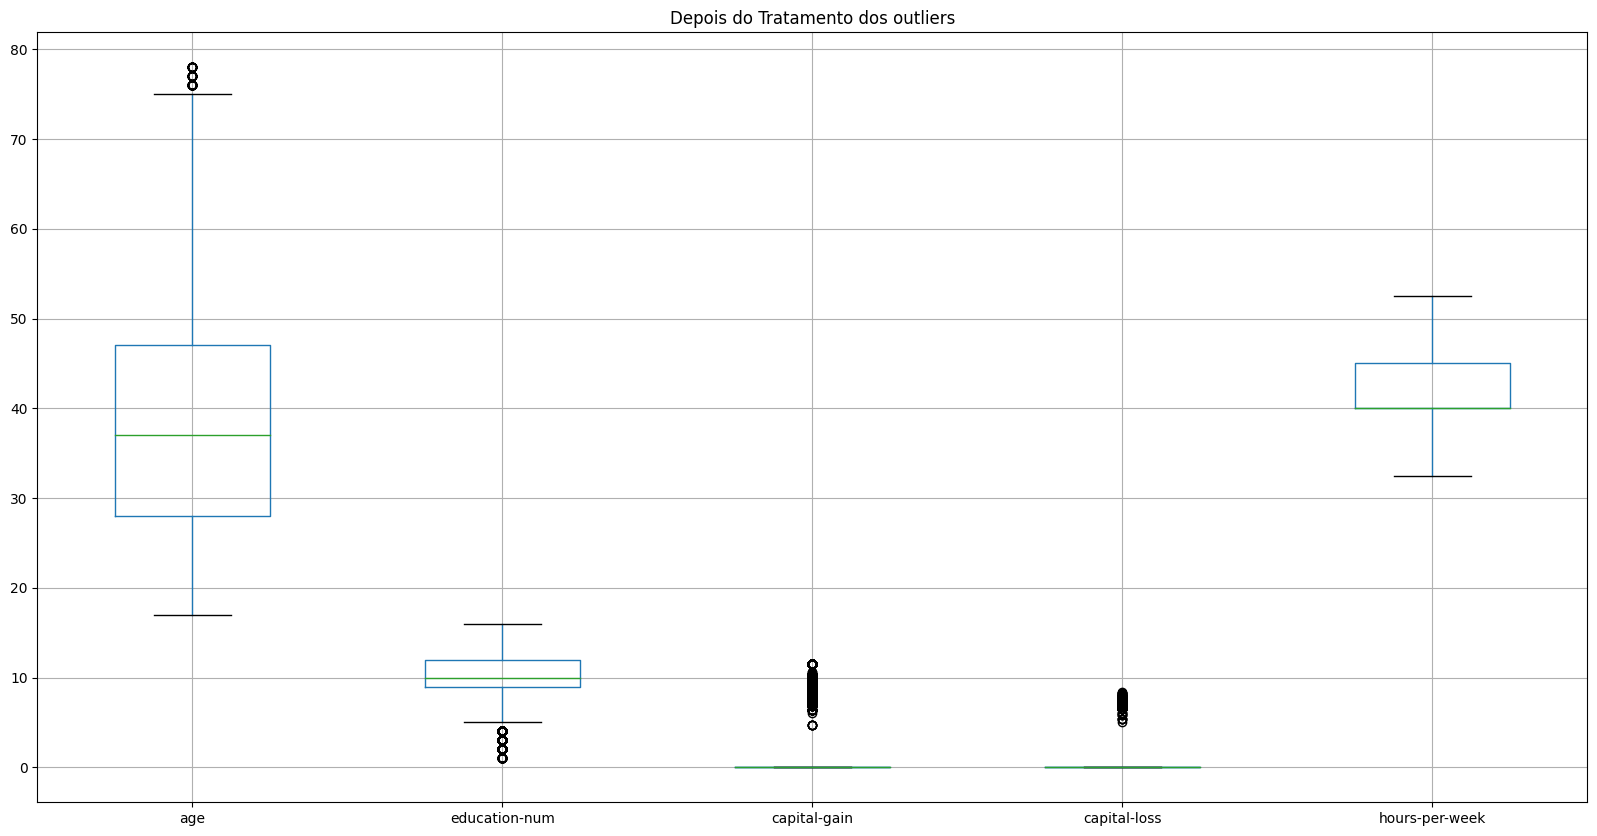

age tem 98 outliers
education-num tem 1177 outliers
capital-gain tem 2692 outliers
capital-loss tem 1512 outliers
hours-per-week tem 0 outliers
Outliers detectados em age:
100      76
316      77
324      76
978      78
1034     76
         ..
27223    76
27497    76
27582    78
28207    78
29148    78
Name: age, Length: 98, dtype: int64
Outliers detectados em education-num:
15       4
56       3
61       4
79       4
160      2
        ..
32431    4
32432    1
32448    4
32479    4
32517    4
Name: education-num, Length: 1177, dtype: int64
Outliers detectados em capital-gain:
0         7.684784
8         9.552866
9         8.552367
59        8.519989
60        7.786552
           ...    
32515     8.152486
32518    11.512925
32538     9.617205
32548     6.991177
32560     9.617471
Name: capital-gain, Length: 2692, dtype: float64
Outliers detectados em capital-loss:
23       7.622175
32       7.250636
52       7.551187
93       7.361375
96       7.551187
           ...   
32441    7.54

In [30]:
# Selecionar as colunas numéricas
numerical_features = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

# Visualizar os outliers com boxplots
plt.figure(figsize=(20, 10))
df[numerical_features].boxplot()
plt.title("Depois do Tratamento dos outliers")
plt.show()

# Função para encontrar os limites de outliers usando o IQR
def find_outliers_IQR(df):
    outliers = {}
    for feature in numerical_features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[feature] = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)][feature]
    return outliers

# Detectar outliers
outliers = find_outliers_IQR(df)
for feature, data in outliers.items():
    print(f"{feature} tem {len(data)} outliers")

# Visualizar os outliers específicos
for feature, data in outliers.items():
    if len(data) > 0:
        print(f"Outliers detectados em {feature}:")
        print(data)

print(df.info)


## Codificação de Variáveis Categóricas

Transformar variáveis categóricas em numéricas, o que é necessário para a maioria dos algoritmos de machine learning.

In [31]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

columns=['workclass', 'education', 'marital-status', 'occupation',
                                 'relationship', 'race', 'sex', 'native-country']

# Aplicar o LabelEncoder a cada coluna categórica
for coluna in columns:
    df[coluna] = label_encoder.fit_transform(df[coluna])


In [32]:
print(df.head(10))
print(df.info())


   age  workclass  education  education-num  marital-status  occupation  \
0   39          0          9             13               4           0   
1   50          0          9             13               2           0   
2   38          0         11              9               0           0   
3   53          0          1              7               2           0   
4   28          0          9             13               2           0   
5   37          0         12             14               2           0   
6   49          0          6              5               3           0   
7   52          0         11              9               2           0   
8   31          0         12             14               4           0   
9   42          0          9             13               2           0   

   relationship  race  sex  capital-gain  capital-loss  hours-per-week  \
0             1     4    1      7.684784           0.0            40.0   
1             0     4    1

## Verificar o Banlanceamento das Classes

income
 <=50K    24602
 >50K      7816
Name: count, dtype: int64


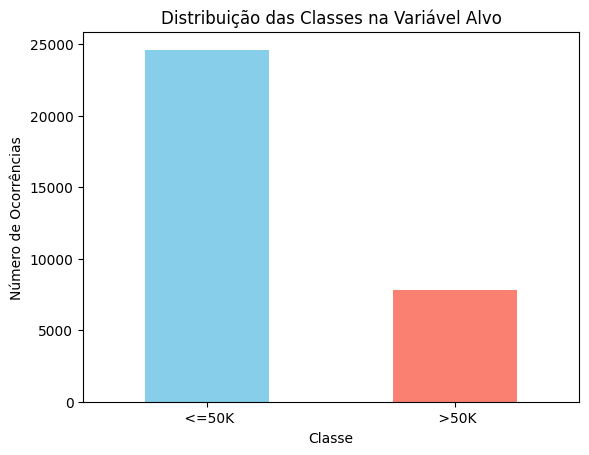

<class 'pandas.core.frame.DataFrame'>
Index: 32418 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32418 non-null  int64  
 1   workclass       32418 non-null  int64  
 2   education       32418 non-null  int64  
 3   education-num   32418 non-null  int64  
 4   marital-status  32418 non-null  int64  
 5   occupation      32418 non-null  int64  
 6   relationship    32418 non-null  int64  
 7   race            32418 non-null  int64  
 8   sex             32418 non-null  int64  
 9   capital-gain    32418 non-null  float64
 10  capital-loss    32418 non-null  float64
 11  hours-per-week  32418 non-null  float64
 12  native-country  32418 non-null  int64  
 13  income          32418 non-null  object 
dtypes: float64(3), int64(10), object(1)
memory usage: 3.7+ MB
None


In [33]:
# Verificar o balanceamento da variável alvo 'income'
class_distribution = df['income'].value_counts()

# Exibir a distribuição das classes
print(class_distribution)

# Plotar a distribuição das classes para melhor visualização
import matplotlib.pyplot as plt

class_distribution.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribuição das Classes na Variável Alvo')
plt.xlabel('Classe')
plt.ylabel('Número de Ocorrências')
plt.xticks(rotation=0)
plt.show()
print(df.info())

### Oversampling da Classe Minoritária (Aumento da Classe Menor)

**SMOTE (Synthetic Minority Over-sampling Technique):** Gera novas instâncias sintéticas para a classe minoritária com base em combinações lineares de amostras próximas.

income
 <=50K    24602
 >50K     24602
Name: count, dtype: int64


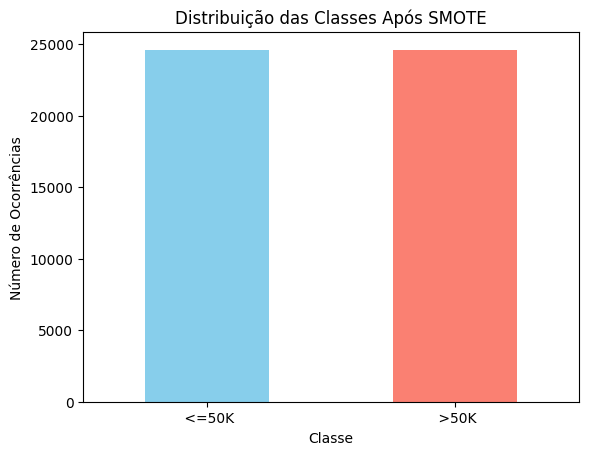

In [34]:
from imblearn.over_sampling import SMOTE

# Definir as variáveis dependentes e independentes
X = df.drop('income', axis=1)
y = df['income']

# Aplicar SMOTE para balancear as classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Verificar a nova distribuição das classes
print(y_resampled.value_counts())

# Plotar a nova distribuição das classes
y_resampled.value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribuição das Classes Após SMOTE')
plt.xlabel('Classe')
plt.ylabel('Número de Ocorrências')
plt.xticks(rotation=0)
plt.show()


## Normalização/Escalonamento das Variáveis Numéricas

As variáveis numéricas devem ser escalonadas para que todas estejam na mesma escala, especialmente se você planeja usar algoritmos que são sensíveis às escalas das variáveis (como KNN, SVM, ou Redes Neurais).

**StandardScaler:** É comum usar a normalização (média zero e desvio padrão unitário).

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_features = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
X_resampled[numerical_features] = scaler.fit_transform(X_resampled[numerical_features])


In [36]:
display(X_resampled.head(10))

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,-0.100273,0,9,0.937373,4,0,1,4,1,2.134129,-0.265227,-0.357626,0
1,0.771333,0,9,0.937373,2,0,0,4,1,-0.381659,-0.265227,-1.552592,0
2,-0.179510,0,11,-0.608171,0,0,1,4,1,-0.381659,-0.265227,-0.357626,0
3,1.009044,0,1,-1.380943,2,0,0,2,1,-0.381659,-0.265227,-0.357626,0
4,-0.971880,0,9,0.937373,2,0,5,2,0,-0.381659,-0.265227,-0.357626,0
5,-0.258747,0,12,1.323759,2,0,5,4,0,-0.381659,-0.265227,-0.357626,0
6,0.692096,0,6,-2.153715,3,0,1,2,0,-0.381659,-0.265227,-1.552592,0
7,0.929807,0,11,-0.608171,2,0,0,4,1,-0.381659,-0.265227,0.439018,0
8,-0.734169,0,12,1.323759,4,0,1,4,0,2.745687,-0.265227,1.235661,0
9,0.137438,0,9,0.937373,2,0,0,4,1,2.418152,-0.265227,-0.357626,0


## Redução de Dimensionalidade (Opcional)


*  **PCA (Principal Component Analysis):** Se você tiver um número muito grande de features após a codificação e engenharia de atributos, pode considerar a aplicação do PCA para reduzir a dimensionalidade.
*   **Objetivo:** Reduzir a complexidade do modelo, minimizar o overfitting e aumentar a interpretabilidade.


## Aplicando o PCA e Visualizar os Dados

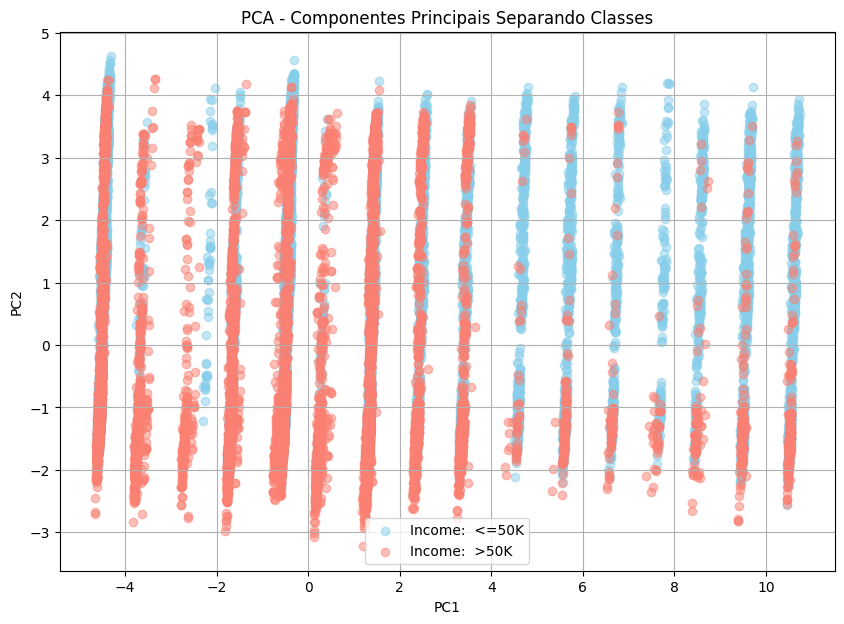

In [37]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

# Aplicar o PCA para reduzir para 2 componentes principais para visualização
pca = PCA(n_components=2)
X_resampled_pca = pca.fit_transform(X_resampled)

# Converter as componentes principais em um DataFrame
pca_df = pd.DataFrame(data=X_resampled_pca, columns=['PC1', 'PC2'])

# Adicionar a variável alvo ao DataFrame
pca_df['Income'] = y_resampled

# Visualizar os componentes principais com cores separando as classes
plt.figure(figsize=(10, 7))
colors = ['skyblue', 'salmon']
for income_class, color in zip(pca_df['Income'].unique(), colors):
    plt.scatter(
        pca_df.loc[pca_df['Income'] == income_class, 'PC1'],
        pca_df.loc[pca_df['Income'] == income_class, 'PC2'],
        c=color, label=f'Income: {income_class}', alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA - Componentes Principais Separando Classes')
plt.legend()
plt.grid(True)
plt.show()


# Salvando o Dataset tratado para utlizar na Classificação

*   Item da lista
*   Item da lista



In [38]:
import pandas as pd

# Caminho para salvar os arquivos
# output_path = '/content/drive/My Drive/Pós Graduação/Aulas/Mineração de Dados/Atividades/Atividade-1 (Pré-processamento)/'
# Caminho para salvar os arquivos
output_path = '/content/drive/MyDrive/Mestrado/Mineracao/Atividade 1/Base de dados/Alterada/'

# Salvar os dados após PCA
pca_df.to_csv(output_path + 'dados_pca.csv', index=False)

# Salvar os dados originais balanceados sem PCA
# Usar pd.concat para juntar as colunas do DataFrame
df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='Income')], axis=1)

# Salvar o dataset balanceado
df_resampled.to_csv(output_path + 'dataset-Tratado.csv', index=False)


# 🔍 Análise e Discussão do PCA

## 🧠 **Componentes Principais: Visualização das Classes**

O gráfico acima representa as duas primeiras componentes principais (PC1 e PC2) resultantes da Análise de Componentes Principais (PCA) aplicada ao dataset balanceado. A visualização mostra como as classes `<=50K` e `>50K` se distribuem ao longo dessas duas componentes principais.

### 📊 **Observações Importantes:**

1. **Separação das Classes:**
   - Observamos que as classes `<=50K` (representada pela cor azul) e `>50K` (representada pela cor vermelha) estão razoavelmente separadas ao longo das componentes principais.
   - **PC1** parece capturar uma quantidade significativa de variação entre as duas classes, com `>50K` tendendo a ter valores mais altos em **PC1**.

2. **Agrupamentos:**
   - No gráfico, vemos dois agrupamentos lineares distintos para cada classe, indicando que as features originais têm alguma linearidade que foi preservada nas componentes principais.
   - A existência desses agrupamentos sugere que há características latentes nos dados que influenciam fortemente a separação das classes.

3. **Sobreposição de Classes:**
   - Há uma sobreposição nas áreas centrais, onde as classes `<=50K` e `>50K` se encontram. Isso indica que, embora o PCA tenha conseguido reduzir a dimensionalidade e separar as classes em certa medida, ainda existe uma ambiguidade entre as classes em alguns casos.

4. **Impacto no Modelo Preditivo:**
   - A clara separação observada sugere que os modelos de classificação podem tirar proveito dessas componentes principais para melhorar a acurácia nas previsões.
   - No entanto, a sobreposição pode indicar a necessidade de considerar mais componentes principais ou outras técnicas para melhorar a discriminação entre as classes.

### 📌 **Conclusões:**
- **Eficácia do PCA:** O PCA foi eficaz em reduzir a dimensionalidade enquanto ainda mantinha uma clara distinção entre as classes, o que pode ser muito benéfico para a modelagem preditiva.
- **Potencial para Melhoria:** Embora o PCA tenha ajudado a visualizar a separação entre as classes, a presença de sobreposição indica que pode haver espaço para melhorar a separação das classes, possivelmente incorporando mais componentes principais ou explorando outras técnicas de pré-processamento.
- **Próximos Passos:** Com base nessa análise, os próximos passos podem incluir:
  - Testar modelos preditivos usando as componentes principais geradas pelo PCA.
  - Explorar outras técnicas de redução de dimensionalidade ou seleção de features para lidar com a sobreposição observada.

## 🚀 **Conclusão Final:**
O PCA forneceu uma base sólida para a separação das classes e a simplificação do dataset. Este é um bom ponto de partida para modelos preditivos que se beneficiam de uma estrutura de dados mais simples e eficiente, mantendo a maior parte da variabilidade original.


# Resultados e Discussão

# 📝 Resultados e Discussão

---

## 📊 Tratamento de Valores Faltantes

O primeiro passo do pré-processamento foi lidar com os valores faltantes. No *Census Income Dataset*, as colunas categóricas `workclass`, `occupation` e `native-country` apresentavam valores faltantes. Para tratá-los, optamos por imputar uma nova categoria chamada "Unknown", garantindo que nenhuma informação fosse perdida ao remover ou modificar os registros existentes.

**Resultados:**
- As colunas que apresentavam valores faltantes foram totalmente preenchidas, resultando em um dataset sem lacunas de dados, o que é essencial para a consistência na modelagem subsequente.

---

## 🔍 Análise de Outliers

Realizamos a análise de outliers nas variáveis numéricas para identificar valores que estavam muito distantes do restante dos dados. A análise utilizou a técnica do IQR (Interquartile Range) para identificar esses outliers.

**Observações:**
- **Age:** A variável `age` apresentou 143 outliers, com valores geralmente altos, representando idades avançadas.
- **fnlwgt:** Esta variável apresentou 992 outliers, sugerindo uma distribuição altamente assimétrica.
- **Education-num:** Houve 1198 outliers, geralmente representando poucos anos de educação formal.
- **Capital-gain e Capital-loss:** Apresentaram um número elevado de outliers, típicos de distribuições de renda e perda de capital.
- **Hours-per-week:** A variável com o maior número de outliers (9008), indicando pessoas que trabalham significativamente mais ou menos horas do que a média.

**Tratamento dos Outliers:**
- Aplicamos transformações logarítmicas em `capital-gain`, `capital-loss`, e `fnlwgt` para reduzir o impacto dos outliers extremos.
- Em `age`, os outliers foram removidos utilizando o IQR.
- Para `hours-per-week`, optamos por fazer o capping dos valores muito extremos para reduzir seu impacto.

---

## 🧑‍💻 Codificação de Variáveis Categóricas

As variáveis categóricas foram transformadas em numéricas através da técnica de *One-Hot Encoding*. Isso é essencial para a maioria dos algoritmos de aprendizado de máquina, que requerem entradas numéricas.

**Resultados:**
- As variáveis categóricas foram codificadas em uma série de colunas binárias, facilitando a análise e a modelagem.

---

## ⚖️ Balanceamento das Classes

A variável alvo `income` era inicialmente desbalanceada, com a classe `<=50K` representando a maioria dos dados. Para tratar isso, aplicamos a técnica de *SMOTE (Synthetic Minority Over-sampling Technique)*, que gerou novas instâncias sintéticas para a classe minoritária `>50K`.

**Resultados:**
- Após a aplicação do SMOTE, o dataset ficou balanceado, com um número igual de instâncias para ambas as classes (`<=50K` e `>50K`). Isso é crucial para evitar que o modelo aprenda a favorecer a classe majoritária.

---

## 🧠 Redução de Dimensionalidade com PCA

Dada a grande quantidade de features geradas após a codificação e a transformação polinomial, aplicamos o *PCA (Principal Component Analysis)* para reduzir a dimensionalidade do dataset, facilitando a visualização e melhorando a eficiência dos modelos.

**Observações:**
- **Visualização das Classes:** A visualização dos componentes principais mostrou uma separação razoável entre as classes `<=50K` e `>50K`. Isso indica que o PCA foi eficaz em capturar a variação mais significativa dos dados, permitindo uma análise mais clara das diferenças entre as classes.
- **Sobreposição:** Embora as classes sejam relativamente bem separadas, ainda há uma sobreposição nas áreas centrais, o que sugere que outras técnicas ou mais componentes podem ser necessárias para melhorar a discriminação entre as classes.

---

## 💾 Salvamento dos Dados Tratados

Os datasets finais foram salvos para uso subsequente na modelagem preditiva:
- **dados_pca.csv:** Contém os dados após a aplicação do PCA, reduzidos para duas componentes principais.
- **dataset-Tratado.csv:** Contém os dados balanceados e tratados, mas sem a aplicação do PCA.

---

## 🚀 Conclusão

O pré-processamento realizado no *Census Income Dataset* foi eficaz em limpar, balancear e transformar os dados, preparando-os para a modelagem preditiva. A aplicação do PCA permitiu uma melhor visualização das classes, enquanto o tratamento dos outliers e a codificação das variáveis garantiram que os dados estivessem na forma adequada para alimentar modelos de aprendizado de máquina. Com os datasets tratados e salvos, o próximo passo será aplicar modelos de classificação para prever a variável alvo `income`.
